# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import date

# Import API key
from dotenv import load_dotenv
import os
#adds variable from environments - need to pip install python-dotenv
load_dotenv()

###

# Establish Key Variables
weather_api_key = os.environ.get("weather_api_key")  # Comment out this line and replace value of g_key below with a valid API key
g_key = os.environ.get("g_key") # replace os.environ.get("g_key") with a valid API key


### If no key available, Uncomment the below code and skip kernels skip kernels 2, 3, and 4:

# clean_df = pd.read_csv("assets/data/cities.csv")
###

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Tells user code has started
print("Beginning Data Retrieval")
print("-----------------------------")
#initializes dataframe, counts, and lists to pull data
df=pd.DataFrame()
count1 = 1
count2 = 1
cityNames = []
cityLats = []
cityLngs = []
cityMaxTemps = []
cityHumidities = []
cityCloudiness = []
cityWindSpeeds = []
cityCountries = []
cityDates = []
#runs all code in block for each of the cities in the list
for city in cities:
    #pauses for a second - reduces API overload
    time.sleep(1.1)
    #creating URL to pull each city info in imperial units
    query_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    #convets URL data into json
    data = requests.get(query_url).json()
    #if a keyerror is found (no key in JSON file), then will print out "city not found"
    try:
        #prints entry for show - keyerror does NOT happen here
        print(f"Processing Record {count1} of Set {count2} | " + city)
        #first potential keyerror - if tripped will not enter any info into lists
        #otherwise, will append list with data
        cityNames.append(data["name"])
        cityLats.append(data["coord"]['lat'])
        cityLngs.append(data["coord"]["lon"])
        cityMaxTemps.append(data["main"]["temp"])
        cityHumidities.append(data["main"]["humidity"])
        cityCloudiness.append(data["clouds"]["all"])
        cityWindSpeeds.append(data["wind"]["speed"])
        cityCountries.append(data["sys"]["country"])
        cityDates.append(data["dt"])
        #increments "batches" and outputs to user    
        if count1 < 50:
            count1+=1
        elif count1 >= 50:
            count1 = 1    
            count2+=1
    except KeyError:
        print("City not found. Skipping...")
        count1+=1
#fills dataframe with information from lists
df["city"] = cityNames
df["lat"] = cityLats
df["lng"] = cityLngs
df["max_temp"] = cityMaxTemps
df["humidity"] = cityHumidities
df["cloudiness"] = cityCloudiness
df["wind_speed"] = cityWindSpeeds
df["country"] = cityCountries
df["date"] = cityDates
df.head()

| kokoda
Processing Record 49 of Set 9 | inverell
Processing Record 50 of Set 9 | rudnya
Processing Record 1 of Set 10 | mackay
Processing Record 2 of Set 10 | labrea
Processing Record 3 of Set 10 | abha
Processing Record 4 of Set 10 | richards bay
Processing Record 5 of Set 10 | swift current
Processing Record 6 of Set 10 | urucara
Processing Record 7 of Set 10 | araouane
Processing Record 8 of Set 10 | pisco
Processing Record 9 of Set 10 | deputatskiy
Processing Record 10 of Set 10 | toamasina
Processing Record 11 of Set 10 | penzance
Processing Record 12 of Set 10 | coquimbo
Processing Record 13 of Set 10 | katangli
Processing Record 14 of Set 10 | sergeyevka
Processing Record 15 of Set 10 | leeton
Processing Record 16 of Set 10 | halifax
Processing Record 17 of Set 10 | shakawe
Processing Record 18 of Set 10 | bargal
City not found. Skipping...
Processing Record 19 of Set 10 | ransang
Processing Record 20 of Set 10 | aparecida do taboado
Processing Record 21 of Set 10 | aiken
Proce

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Paita,-5.09,-81.11,62.17,87,92,9.86,PE,1600660112
1,Ushuaia,-54.80,-68.30,41.00,75,75,10.29,AR,1600660113
2,Hilo,19.73,-155.09,72.43,54,1,6.93,US,1600660114
3,Rikitea,-23.12,-134.97,72.46,77,59,23.58,PF,1600659675
4,Badulla,6.99,81.06,81.30,57,93,3.24,LK,1600660117


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [4]:
### Comment out the below code to use cities.csv - see first kernel for further instructions


#code pulls only the data from the cities where the humidity is greater than 100%
clean_df = df.loc[df.humidity < 100]



In [5]:
#exporting cleaned (humidity>100%) html
clean_df.to_html("assets/data/WeatherPy_Clean_Output_HTML")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

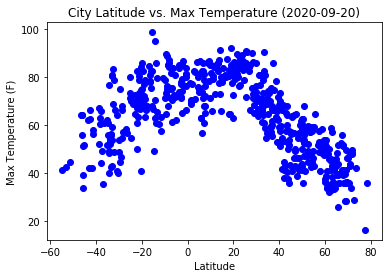

Based on the plot of max temperature vs city latitude we see what we know intuitively to be true, namely that temperature generally rises the closer you are to the equator (the closer that your latitude is to 0). It is interesting to point out, however, that the largest temperatures are not at 0, but at ~20 and ~(-10). This may be due to the landscape in those locations or earth's axis' natural tilt


In [10]:
figure = plt.scatter(clean_df.lat,clean_df.max_temp,color='b')
plt.title(f"City Latitude vs. Max Temperature ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("assets/images/General_Temperature_Chart.png")
plt.show()
print("Based on the plot of max temperature vs city latitude we see what we know intuitively to be true, namely that temperature generally rises the closer you are to the equator (the closer that your latitude is to 0). It is interesting to point out, however, that the largest temperatures are not at 0, but at ~20 and ~(-10). This may be due to the landscape in those locations or earth's axis' natural tilt")

## Latitude vs. Humidity Plot

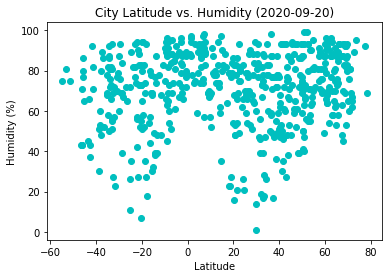

There seem to be slightly less concentrations of low humidities farther from the equator which makes sense as there would be less heat to evaporate water. The majority of humidities near the equator seem to be high, while in that ~20 and ~(-10) range, again, is where the data shows low humidity - which supports our findings on max temperature above.


In [11]:
figure = plt.scatter(clean_df.lat,clean_df.humidity,color='c')
plt.title(f"City Latitude vs. Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("assets/images/General_Humidity_Chart.png")
plt.show()
print("There seem to be slightly less concentrations of low humidities farther from the equator which makes sense as there would be less heat to evaporate water. The majority of humidities near the equator seem to be high, while in that ~20 and ~(-10) range, again, is where the data shows low humidity - which supports our findings on max temperature above.")

## Latitude vs. Cloudiness Plot

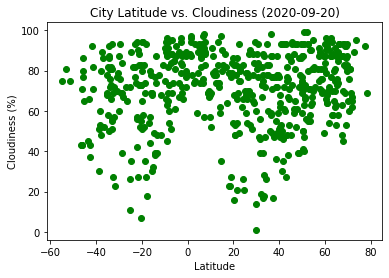

It is interesting to note that this graph is almost identical to the one above measuring humidity. This makes sense since clouds are made of evaporated water. Similar analysis applies.


In [12]:
figure = plt.scatter(clean_df.lat,clean_df.humidity,color='g')
plt.title(f"City Latitude vs. Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("assets/images/General_Cloudiness_Chart.png")
plt.show()
print("It is interesting to note that this graph is almost identical to the one above measuring humidity. This makes sense since clouds are made of evaporated water. Similar analysis applies.")

## Latitude vs. Wind Speed Plot

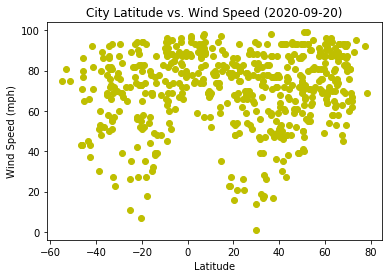

Wind Speed when compared to latitude is also simliar to the humidity and cloudiness graphs, though a bit less so. It seems as though Wind Speed could play a major factor the aspects of climate that relate to humidity and cloudiness.


In [13]:
figure = plt.scatter(clean_df.lat,clean_df.humidity,color='y')
plt.title(f"City Latitude vs. Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("assets/images/General_Wind_Speed_Chart.png")
plt.show()
print("Wind Speed when compared to latitude is also simliar to the humidity and cloudiness graphs, though a bit less so. It seems as though Wind Speed could play a major factor the aspects of climate that relate to humidity and cloudiness.")